# Exercise 1 Perceptron Learning

Task1

1.Generate two separable normal distributed datasets in 2D

2.Label one dataset with -1and one with +1

3.Shuffle both datasets together

4.Implement the perceptron with numpymatrices

5.Initialize perceptron weights randomly

6.Define an appropriate stopping criterion

7.Apply perceptron learning rule to the data

8.Plot the samples and the learned decision boundary together

In [17]:
import numpy as np
import scipy
from matplotlib import pyplot
import random

1.Generate two separable normal distributed datasets in 2D

In [45]:
#create training data: assume x_0 = 1 in any case
#parametera are: mean per dimension, std per dimension,size

data1 = np.random.normal((1,-5,3),(0,2,2),(100,3))
#mean is (1,-5,3),std is (0,2,2),size is 100X3

data2 = np.random.normal((1,3,-5),(0,2,2),(100,3))
#mean is (1,-5,3),std is (0,2,2),size is 100X3

2.Label one dataset with -1and one with +1

In [46]:
#collect in one list
samples = [(sample,-1) for sample in data1] + [(sample,1) for sample in data2]
print(samples[1:5])

[(array([ 1.        , -7.12912139,  2.55734103]), -1), (array([ 1.        , -5.81959724,  1.12827438]), -1), (array([ 1.        , -3.44160774,  1.15364315]), -1), (array([ 1.        , -2.93802543,  4.01288208]), -1)]


3.Shuffle both datasets together

In [47]:
#random shuffle list
random.shuffle(samples)#随机排序

4.Implement the perceptron with numpymatrices

5.Initialize perceptron weights randomly

6.Define an appropriate stopping criterion

7.Apply perceptron learning rule to the data

In [48]:
weights = np.random.normal(size = 3)

In [49]:
#stopping criterion: iterate until all samples are classified correctly
# count number of incorrectly classified samples
incorrect = len(samples)
while incorrect > 0:
    
    #iterate over all samples
    incorrect = 0
    for x, t in samples:#自动分辨x,t
        #predict class
        if np.dot(weights,x) * t < 0: #if wx * t < 0, w_new = w + tx
            incorrect += 1
            weights += t * x

8.Plot the samples and the learned decision boundary together

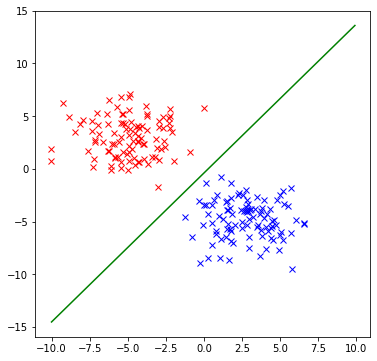

In [50]:
#create figure in square shape
pyplot.figure(figsize = (6,6))
#plot points
pyplot.plot(data1[:,1],data1[:,2],"rx")#x1,x2 of group1
pyplot.plot(data2[:,1],data2[:,2],"bx")#x1,x2 of group2

#compute intersection from plane with z = 0
x_1 = np.arange(-10.0,10.0,0.1)
#weights[0] + weights[1]*x_1 + weights[2]*x_2 = 0
x_2 = (-weights[0]-weights[1]*x_1)/weights[2]
#plot line
pyplot.plot(x_1,x_2,"g-")

#finalize plot
pyplot.xlim((-10,10))
pyplot.ylim((-10,10))
pyplot.xlabel("$x_1$")
pyplot.ylabel("$x_2$")

#write to file 
pyplot.savefig("Perceptron.pdf")